# Ejercicio 1 - Heladería

Se quiere calcular la catidad de clientes que tendrá una heladería dependiendo de la temperatura exterior.

- Si la temperatura es <b>alta</b> entonces la heladería estará <b>llena</b>
- Si la temperatura es <b>moderada</b> entonces la heladería estará <b>ocupada</b>
- Si la temperatura es <b>baja</b> entonces la heladería estará <b>tranquila</b>

El número máximo de clientes para el local es de 35 clientes.
Definir los rangos de pertenencias para los antecedentes y consecuentes.

In [14]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

## Antecendentes

Definir y graficar los antecedentes para el problema.

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


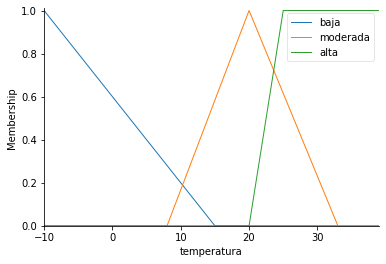

In [22]:
temperatura = ctrl.Antecedent(np.arange(-10, 40, 1), 'temperatura')
temperatura['baja'] = fuzz.trimf(temperatura.universe, [-10, -10, 15])
temperatura['moderada'] = fuzz.trimf(temperatura.universe, [8, 20, 33])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [20, 25, 40, 40])
temperatura.view()


## Consecuentes

Definir y gráficar los antecedentes para el problema.

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


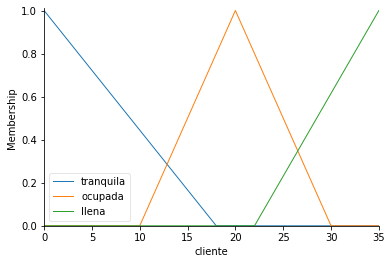

In [34]:
cliente = ctrl.Consequent(np.arange(0, 36, 1), 'cliente')
cliente['tranquila'] = fuzz.trimf(cliente.universe, [0, 0, 18])
cliente['ocupada'] = fuzz.trimf(cliente.universe, [10, 20, 30])
cliente['llena'] = fuzz.trimf(cliente.universe, [22, 35, 35])
cliente.view()


## Reglas

Definir las reglas para el sistema.

In [41]:
cliente.defuzzify_method = 'centroid'
rules = []
rules.append(ctrl.Rule(temperatura['baja'], cliente['tranquila']))
rules.append(ctrl.Rule(temperatura['moderada'], cliente['ocupada']))
rules.append(ctrl.Rule(temperatura['alta'], cliente['llena']))


## Simulación

Simular y graficar la salida del sistema para las siguientes temperaturas.
 - -10º
 - 0º
 - 10º
 - 14º
 - 20º
 - 33 º

 Antecedents 
Antecedent: temperatura             = 33
  - baja                            : 0.0
  - moderada                        : 0.0
  - alta                            : 1.0

 Rules 
RULE #0:
  IF temperatura[baja] THEN cliente[tranquila]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - temperatura[baja]                                      : 0.0
                                         temperatura[baja] = 0.0
  Activation (THEN-clause):
                                        cliente[tranquila] : 0.0

RULE #1:
  IF temperatura[moderada] THEN cliente[ocupada]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - temperatura[moderada]                                  : 0.0
                                     temperatura[moderada] = 0.0
  Activation (THEN-clause):
                                          cliente[ocupada] : 0.0

RULE #2:
  IF temperatura[alta] THEN cliente[llena]
	AND agg

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


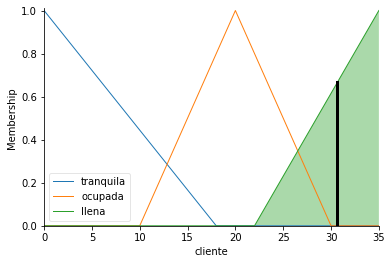

In [48]:
ctrSys = ctrl.ControlSystem(rules)
personas = ctrl.ControlSystemSimulation(ctrSys)

personas.input['temperatura'] = 33
personas.compute()
personas.print_state() #Archivo control/controlsystem.py modificado
cliente.view(sim=personas)
print("Resultado: " + str(personas.output['cliente']))

- temperatura: -10 / clientes: 5.99
- temperatura: 0   / clientes: 6.68
- temperatura: 10  / clientes: 13.92
- temperatura: 14  / clientes: 19.21
- temperatura: 20  / clientes: 19.99
- temperatura: 33  / clientes: 30.66